In [1]:
import pandas as pd
import numpy as np

In [3]:
path = 'https://raw.githubusercontent.com/MaduAraujo/Challenge-Telecom-X-2/main/dados_limpos.csv'
file_name = '/dados_limpos.csv'
file_path = path

dados = pd.read_csv(file_path)
dados.head()

,ID_cliente,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Servico_de_internet,...,Protecao_dipositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Metodo_de_pagamento,Total_servico_dia,Total_servico_mes,Total_gasto
0,0002-ORFBO,Nao,Mulher,Nao,Sim,Sim,9,Sim,Nao,DSL,...,Nao,Sim,Sim,Nao,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Nao,Homem,Nao,Nao,Nao,9,Sim,Sim,DSL,...,Nao,Nao,Nao,Sim,Mensal,Nao,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Homem,Nao,Nao,Nao,4,Sim,Nao,Fiber optic,...,Sim,Nao,Nao,Nao,Mensal,Sim,Cheque eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Homem,Sim,Sim,Nao,13,Sim,Nao,Fiber optic,...,Sim,Nao,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,Sim,Sim,Nao,3,Sim,Nao,Fiber optic,...,Nao,Sim,Sim,Nao,Mensal,Sim,Cheque,2.80,83.9,267.40


In [4]:
dados.drop(columns='ID_cliente', inplace = True)

**Verificando a existencia de desbalancemento nos dados**

In [5]:
dados.Evasao.value_counts()

,count
Evasao,
Nao,5174
Sim,1869


In [6]:
import plotly.express as px

px.histogram(dados, x ='Evasao', title = 'Contagem de Evasões', template = 'simple_white', text_auto=True, color = 'Evasao',
                color_discrete_map={
                "Nao": "blue", "Sim": "red"
                },
                )

**Aplicando enconding nos dados**

Enconding Binário

In [8]:
dict_yes_no = {'Sim' : '1' , 'Nao' : '0', 'Sem servico de telefone' : '0' , 'Sem servico de internet' : '0'}

colunas_yes_no = ['Evasao','Cidadao_Senior', 'Parceiro','Dependentes', 'Servico_de_telefone','Linhas_multiplas',
                'Segurnaca_online', 'Backup_online', 'Protecao_dipositivo',
                'Suporte_tecnico','Streaming_TV','Streaming_filmes','Fatura_online']

for coluna in colunas_yes_no:
    dados[coluna].replace(dict_yes_no, inplace=True)

In [10]:
mapa = {'Mulher': 1, 'Homem': 0}

dados['Genero'].replace(mapa, inplace = True)

dados.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Servico_de_internet,Segurnaca_online,...,Protecao_dipositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Metodo_de_pagamento,Total_servico_dia,Total_servico_mes,Total_gasto
0,0,1,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Anual,1,Cheque,2.19,65.6,593.30
1,0,0,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mensal,0,Cheque,2.00,59.9,542.40
2,1,0,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Mensal,1,Cheque eletrônico,2.46,73.9,280.85
3,1,0,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Mensal,1,Cheque eletrônico,3.27,98.0,1237.85
4,1,1,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Mensal,1,Cheque,2.80,83.9,267.40


**Label Enconding e One Hot Enconding**

Label Enconding

In [11]:
from sklearn import preprocessing

ordem_tipo_contrato = ['Mensal', 'Bienal', 'Anual']

ordinal_enconder = preprocessing.OrdinalEncoder(categories = [ordem_tipo_contrato])

dados['Tipo_de_contrato'] = ordinal_enconder.fit_transform(dados[['Tipo_de_contrato']])

One Hot Enconding

In [12]:
dados = pd.get_dummies(data = dados, columns=['Servico_de_internet','Metodo_de_pagamento'])
dados.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Total_servico_dia,Total_servico_mes,Total_gasto,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Servico_de_internet_Nao,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Cheque eletrônico,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,9,1,0,0,1,...,2.19,65.6,593.30,True,False,False,False,True,False,False
1,0,0,0,0,0,9,1,1,0,0,...,2.00,59.9,542.40,True,False,False,False,True,False,False
2,1,0,0,0,0,4,1,0,0,0,...,2.46,73.9,280.85,False,True,False,False,False,True,False
3,1,0,1,1,0,13,1,0,0,1,...,3.27,98.0,1237.85,False,True,False,False,False,True,False
4,1,1,1,1,0,3,1,0,0,0,...,2.80,83.9,267.40,False,True,False,False,True,False,False


In [13]:
print('Anteriormente tinhamos 21 colunas, agora temos %d' % (dados.shape[1]))

Anteriormente tinhamos 21 colunas, agora temos 26


In [14]:
tipo_colunas = dados.dtypes.reset_index()
colunas_object = tipo_colunas[tipo_colunas[0] == 'object']
lista_colunas_object = list(colunas_object['index'])
lista_colunas_object

['Evasao',
 'Cidadao_Senior',
 'Parceiro',
 'Dependentes',
 'Servico_de_telefone',
 'Linhas_multiplas',
 'Segurnaca_online',
 'Backup_online',
 'Protecao_dipositivo',
 'Suporte_tecnico',
 'Streaming_TV',
 'Streaming_filmes',
 'Fatura_online']

In [15]:
for coluna in lista_colunas_object:
    dados[coluna] = pd.to_numeric(dados[coluna] , errors='coerce')

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Evasao                                                 7043 non-null   int64  
 1   Genero                                                 7043 non-null   int64  
 2   Cidadao_Senior                                         7043 non-null   int64  
 3   Parceiro                                               7043 non-null   int64  
 4   Dependentes                                            7043 non-null   int64  
 5   Tempo_de_contrato                                      7043 non-null   int64  
 6   Servico_de_telefone                                    7043 non-null   int64  
 7   Linhas_multiplas                                       7043 non-null   int64  
 8   Segurnaca_online                                

Calculando o VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
X = dados.drop(columns = 'Evasao')

for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

vif_dados = pd.DataFrame()
vif_dados["feature"] = X.columns

vif_dados["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_dados)

                                              feature           VIF
0                                              Genero  1.002358e+00
1                                      Cidadao_Senior  1.150878e+00
2                                            Parceiro  1.463969e+00
3                                         Dependentes  1.380632e+00
4                                   Tempo_de_contrato  6.636049e+00
5                                 Servico_de_telefone  3.486107e+01
6                                    Linhas_multiplas  7.274090e+00
7                                    Segurnaca_online  6.324672e+00
8                                       Backup_online  6.782956e+00
9                                 Protecao_dipositivo  6.911729e+00
10                                    Suporte_tecnico  6.422809e+00
11                                       Streaming_TV  2.405234e+01
12                                   Streaming_filmes  2.410413e+01
13                                   Tipo_de_con

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



In [20]:
dados_original = dados.copy()

dados.drop(columns = ['Servico_de_internet_Nao', 'Total_servico_dia', 'Total_servico_mes', 'Total_gasto', 'Metodo_de_pagamento_Cheque eletrônico'], inplace = True)

In [23]:
X = dados.drop(columns = 'Evasao')

for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

vif_dados = pd.DataFrame()
vif_dados["feature"] = X.columns

vif_dados["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_dados)

                                              feature       VIF
0                                              Genero  1.914712
1                                      Cidadao_Senior  1.364152
2                                            Parceiro  2.820916
3                                         Dependentes  1.950269
4                                   Tempo_de_contrato  5.814249
5                                 Servico_de_telefone  7.017350
6                                    Linhas_multiplas  2.404808
7                                    Segurnaca_online  1.934044
8                                       Backup_online  2.082107
9                                 Protecao_dipositivo  2.239443
10                                    Suporte_tecnico  2.006101
11                                       Streaming_TV  2.638289
12                                   Streaming_filmes  2.667115
13                                   Tipo_de_contrato  2.505263
14                                      

**Balanceando os dados**

In [24]:
from imblearn.over_sampling import SMOTE

SEED = 20

smote = SMOTE(random_state=SEED)

In [25]:
x = dados.drop('Evasao', axis=1)
y = dados['Evasao']

x_resampled, y_resampled = smote.fit_resample(x,y)

dados_balanceados = pd.concat([y_resampled, x_resampled], axis=1)
dados_balanceados

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,9,1,0,0,1,...,1,1,0,2.0,1,True,False,False,True,False
1,0,0,0,0,0,9,1,1,0,0,...,0,0,1,0.0,0,True,False,False,True,False
2,1,0,0,0,0,4,1,0,0,0,...,0,0,0,0.0,1,False,True,False,False,False
3,1,0,1,1,0,13,1,0,0,1,...,0,1,1,0.0,1,False,True,False,False,False
4,1,1,1,1,0,3,1,0,0,0,...,1,1,0,0.0,1,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0.0,0,True,False,False,True,False
10344,1,0,0,0,0,2,1,1,0,1,...,0,0,0,0.0,1,False,True,False,False,False
10345,1,1,0,0,0,3,1,0,0,1,...,0,1,0,0.0,0,False,True,False,True,False
10346,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0.0,1,True,False,False,False,False


In [26]:
dados_balanceados.Evasao.value_counts()

,count
Evasao,
0,5174
1,5174


**Normalizando os dados Númericos**

In [27]:
numericas = ['Tempo_de_contrato']

for coluna in numericas:

    minimo = dados_balanceados[coluna].min()
    maximo = dados_balanceados[coluna].max()

    dados_balanceados[coluna] = (dados_balanceados[coluna] - minimo)/(maximo-minimo)

dados_balanceados.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,0.125000,1,0,0,1,...,1,1,0,2.0,1,True,False,False,True,False
1,0,0,0,0,0,0.125000,1,1,0,0,...,0,0,1,0.0,0,True,False,False,True,False
2,1,0,0,0,0,0.055556,1,0,0,0,...,0,0,0,0.0,1,False,True,False,False,False
3,1,0,1,1,0,0.180556,1,0,0,1,...,0,1,1,0.0,1,False,True,False,False,False
4,1,1,1,1,0,0.041667,1,0,0,0,...,1,1,0,0.0,1,False,True,False,True,False


**Modelos de Machine Learning**

Sepração em Treino e Teste

In [28]:
from sklearn.model_selection import train_test_split

x = dados_balanceados.drop(columns = 'Evasao')
y = dados_balanceados['Evasao']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=SEED, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_train), len(x_test)))

Treinaremos com 7243 elementos e testaremos com 3105 elementos


**Criando modelos**

Funções

In [29]:
def executa_modelo(modelo, x_train, x_test, y_train):

    modelo.fit(x_train,y_train)
    y_pred = modelo.predict(x_test)

    return y_pred

In [37]:
from sklearn import metrics

def metricas_modelo(y_test, y_pred):
    acuracia = round(metrics.accuracy_score(y_test, y_pred), 4)
    precisao = round(metrics.precision_score(y_test, y_pred), 4)
    recall = round(metrics.recall_score(y_test, y_pred), 4)
    f1 = round(metrics.f1_score(y_test, y_pred), 4)

    metricas = [acuracia, precisao, recall, f1]
    cm = confusion_matrix(y_test, y_pred)

    return metricas, cm

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plotar_matriz_confusao(nome_classificador, cm):

    sns.set(rc = {'figure.figsize':(8,5)})
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt="d")
    ax.set_title(' Matriz de confusão ' + nome_classificador, size = 15);
    ax.set_xlabel('\nPredicted Values', size = 15)
    ax.set_ylabel('Actual Values ', size = 15);

    ax.xaxis.set_ticklabels(['False','True'], size = 12)
    ax.yaxis.set_ticklabels(['False','True'], size = 12)

    plt.show()

In [32]:
def curva_roc(modelo, nome_classificador, y_test):

    y_pred_proba = modelo.predict_proba(x_test)[::,1]
    fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    plt.rcParams['figure.figsize'] = (12., 8.)
    plt.plot(fpr, tpr, label = nome_classificador + ' auc= '+str(auc))
    plt.plot([0 ,1], [0,1], color = 'red', lw = 2, linestyle = '--')
    plt.plot([0, 0], [1, 0], ls="--", c = 'green', lw = 2), plt.plot([1, 1], ls="--", c = 'green')
    plt.title('Curva ROC e AUC', size = 20)
    plt.xlabel("Taxa de falsos positivos", size = 15)
    plt.ylabel("Taxa de verdadeiros positivos", size = 15)
    plt.legend(loc = 4)

**Análise Inicial dos Modelos e escolha do modelo para aprimoração**

In [39]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dummy = DummyClassifier(random_state = SEED, strategy="uniform")
lr = LogisticRegression(max_iter = 1000, random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
svc = SVC(random_state = SEED, probability = True)
knc = KNeighborsClassifier()

classifiers = [dummy, lr, rf, svc, knc]

In [40]:
resultados = {}

for classifier in classifiers:
    y_pred = executa_modelo(classifier, x_train, x_test, y_train)
    resultados[classifier] = y_pred

resultados

{DummyClassifier(random_state=20, strategy='uniform'): array([1, 0, 1, ..., 1, 0, 0]),
 LogisticRegression(max_iter=1000, random_state=20): array([0, 1, 1, ..., 1, 1, 1]),
 RandomForestClassifier(random_state=20): array([1, 1, 1, ..., 1, 1, 1]),
 SVC(probability=True, random_state=20): array([0, 1, 1, ..., 1, 1, 1]),
 KNeighborsClassifier(): array([0, 1, 1, ..., 0, 1, 1])}

In [41]:
index = ['Acurácia', 'Precisão', 'Recall', 'F1']
df_metricas = pd.DataFrame(index = index)

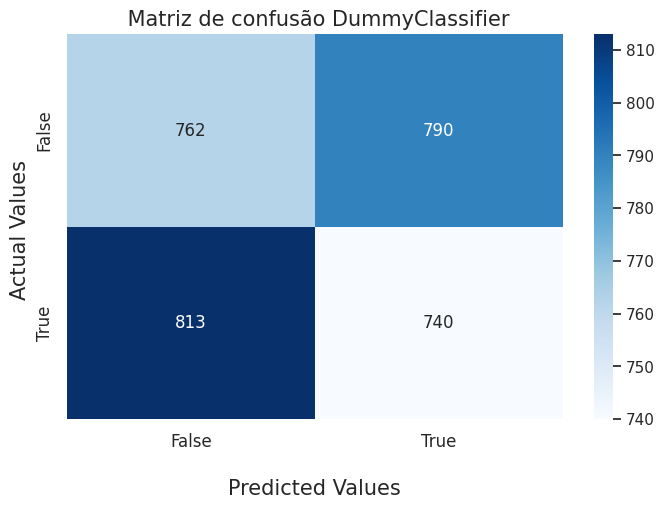

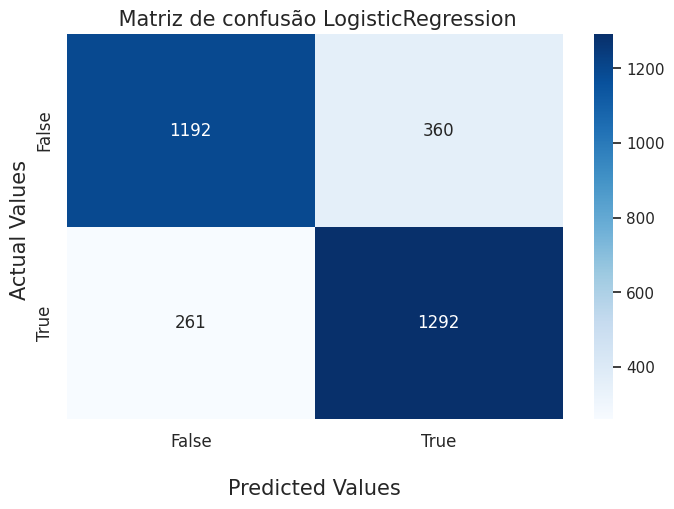

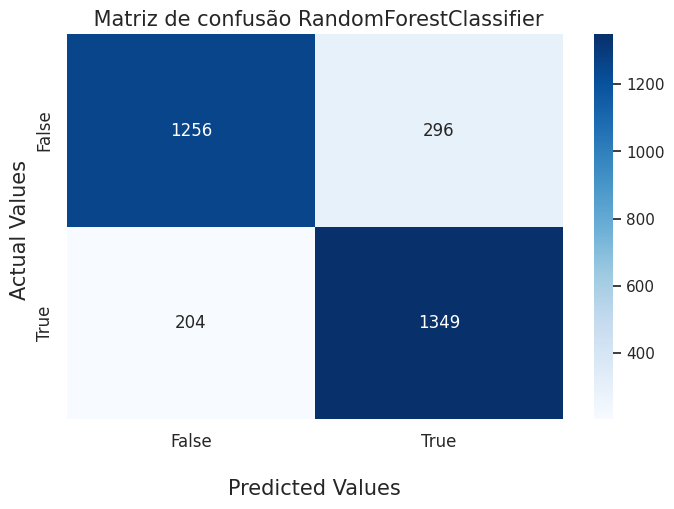

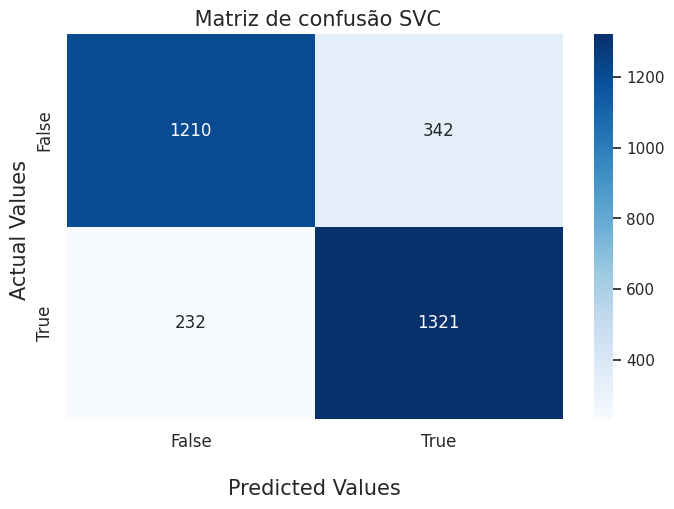

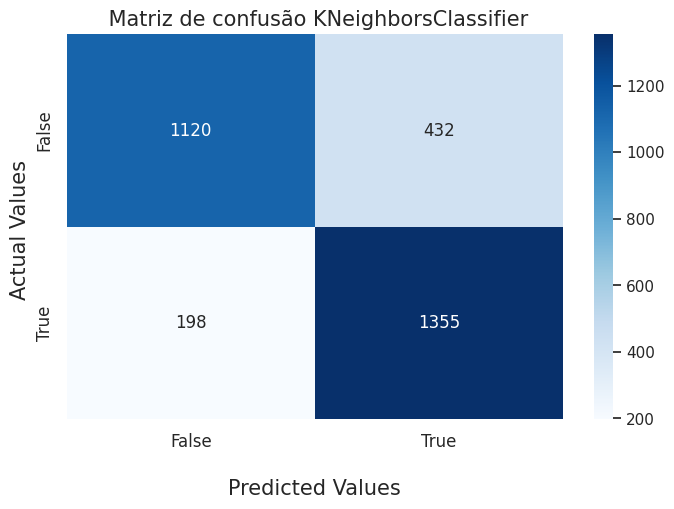

In [42]:
for modelo, y_pred in resultados.items():
    name = modelo.__class__.__name__
    metricas, cm = metricas_modelo(y_test, y_pred)
    df_metricas[name] = metricas
    plotar_matriz_confusao(name, cm)

In [43]:
df_metricas.T.sort_values('Recall', ascending = False)

,Acurácia,Precisão,Recall,F1
KNeighborsClassifier,0.7971,0.7583,0.8725,0.8114
RandomForestClassifier,0.8390,0.8201,0.8686,0.8437
SVC,0.8151,0.7943,0.8506,0.8215
LogisticRegression,0.8000,0.7821,0.8319,0.8062
DummyClassifier,0.4837,0.4837,0.4765,0.4801


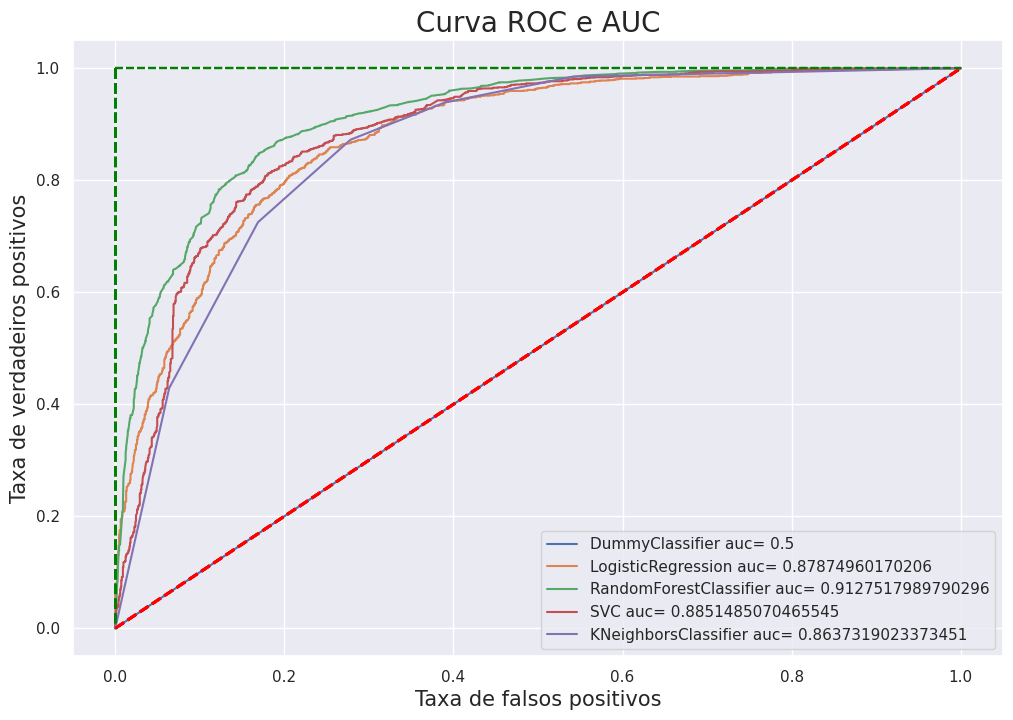

In [44]:
for classifier in classifiers:
    name = classifier.__class__.__name__
    curva_roc(classifier, name, y_test)

**Melhorando o modelo RandomForestClassifier**

In [45]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [46]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [47]:
from sklearn.model_selection import RandomizedSearchCV

new_rf = RandomForestClassifier(random_state=SEED)

In [48]:
random_cv = RandomizedSearchCV(new_rf, param_grid, n_iter=200, cv=3, scoring="recall", n_jobs=-1, verbose = 2,random_state = SEED)

In [49]:
%%time
rcv = random_cv.fit(x, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


222 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
104 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

CPU times: user 3.49 s, sys: 419 ms, total: 3.9 s
Wall time: 2min 46s


In [50]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.769927,0.138998,0.156042,0.019531,160,4,1,sqrt,7,gini,True,"{'n_estimators': 160, 'min_samples_split': 4, ...",0.713043,0.906032,0.894493,0.837856,0.088382,62
1,1.823792,0.259701,0.174877,0.062400,160,2,2,log2,6,gini,True,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.717101,0.894432,0.876522,0.829352,0.079709,123
2,0.326846,0.094759,0.035711,0.011637,20,6,2,log2,5,gini,True,"{'n_estimators': 20, 'min_samples_split': 6, '...",0.731594,0.892111,0.875942,0.833216,0.072160,95
3,0.006223,0.001569,0.000000,0.000000,160,2,4,auto,3,gini,True,"{'n_estimators': 160, 'min_samples_split': 2, ...",NaN,NaN,NaN,NaN,NaN,127
4,0.008002,0.001166,0.000000,0.000000,180,8,4,auto,2,gini,True,"{'n_estimators': 180, 'min_samples_split': 8, ...",NaN,NaN,NaN,NaN,NaN,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.004029,0.001497,0.000000,0.000000,80,8,2,auto,9,entropy,False,"{'n_estimators': 80, 'min_samples_split': 8, '...",NaN,NaN,NaN,NaN,NaN,127
196,0.003139,0.000170,0.000000,0.000000,60,4,1,auto,5,entropy,False,"{'n_estimators': 60, 'min_samples_split': 4, '...",NaN,NaN,NaN,NaN,NaN,127
197,0.002863,0.000174,0.000000,0.000000,100,8,2,auto,8,entropy,False,"{'n_estimators': 100, 'min_samples_split': 8, ...",NaN,NaN,NaN,NaN,NaN,127
198,0.451539,0.034649,0.034738,0.006578,80,2,2,log2,5,gini,False,"{'n_estimators': 80, 'min_samples_split': 2, '...",0.736812,0.892691,0.874203,0.834569,0.069536,89


In [51]:
rcv.best_params_

{'n_estimators': np.int64(100),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': np.int64(9),
 'criterion': 'gini',
 'bootstrap': False}

In [52]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.8312399355877617
Precisão: 0.7972270363951474
Recall: 0.8886027044430135
F1: 0.8404384896467723


**Criação do modelos sem a remoção das colunas realizadas na parte de controle do VIF**

In [53]:
dados_original.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Total_servico_dia,Total_servico_mes,Total_gasto,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Servico_de_internet_Nao,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Cheque eletrônico,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,9,1,0,0,1,...,2.19,65.6,593.30,True,False,False,False,True,False,False
1,0,0,0,0,0,9,1,1,0,0,...,2.00,59.9,542.40,True,False,False,False,True,False,False
2,1,0,0,0,0,4,1,0,0,0,...,2.46,73.9,280.85,False,True,False,False,False,True,False
3,1,0,1,1,0,13,1,0,0,1,...,3.27,98.0,1237.85,False,True,False,False,False,True,False
4,1,1,1,1,0,3,1,0,0,0,...,2.80,83.9,267.40,False,True,False,False,True,False,False


In [54]:
x = dados_original.drop('Evasao', axis=1)
y = dados_original['Evasao']

x_resampled, y_resampled = smote.fit_resample(x,y)

dados_balanceados = pd.concat([y_resampled, x_resampled], axis=1)

dados_balanceados['Evasao'].value_counts()

,count
Evasao,
0,5174
1,5174


In [55]:
numericas = ['Tempo_de_contrato', 'Total_servico_dia', 'Total_servico_mes', 'Total_gasto']

for coluna in numericas:

    minimo = dados_balanceados[coluna].min()
    maximo = dados_balanceados[coluna].max()

    dados_balanceados[coluna] = (dados_balanceados[coluna] - minimo)/(maximo-minimo)

dados_balanceados.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Total_servico_dia,Total_servico_mes,Total_gasto,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Servico_de_internet_Nao,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Cheque eletrônico,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,0.125000,1,0,0,1,...,0.471642,0.471144,0.068315,True,False,False,False,True,False,False
1,0,0,0,0,0,0.125000,1,1,0,0,...,0.414925,0.414428,0.062454,True,False,False,False,True,False,False
2,1,0,0,0,0,0.055556,1,0,0,0,...,0.552239,0.553731,0.032338,False,True,False,False,False,True,False
3,1,0,1,1,0,0.180556,1,0,0,1,...,0.794030,0.793532,0.142531,False,True,False,False,False,True,False
4,1,1,1,1,0,0.041667,1,0,0,0,...,0.653731,0.653234,0.030789,False,True,False,False,True,False,False


In [56]:
x = dados_balanceados.drop(columns = 'Evasao')
y = dados_balanceados['Evasao']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=SEED, stratify = y)

In [57]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dummy = DummyClassifier(random_state = SEED, strategy="uniform")
lr = LogisticRegression(max_iter = 1000, random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
svc = SVC(random_state = SEED, probability = True)
knc = KNeighborsClassifier()

classifiers = [dummy, lr, rf, svc, knc]

In [58]:
resultados = {}

for classifier in classifiers:
    y_pred = executa_modelo(classifier, x_train, x_test, y_train)
    resultados[classifier] = y_pred

resultados

{DummyClassifier(random_state=20, strategy='uniform'): array([1, 0, 1, ..., 1, 0, 0]),
 LogisticRegression(max_iter=1000, random_state=20): array([0, 1, 1, ..., 1, 1, 1]),
 RandomForestClassifier(random_state=20): array([0, 1, 1, ..., 1, 1, 1]),
 SVC(probability=True, random_state=20): array([0, 1, 1, ..., 0, 1, 1]),
 KNeighborsClassifier(): array([0, 0, 1, ..., 1, 1, 1])}

In [59]:
index = ['Acurácia', 'Precisão', 'Recall', 'F1']
df_metricas_1 = pd.DataFrame(index = index)

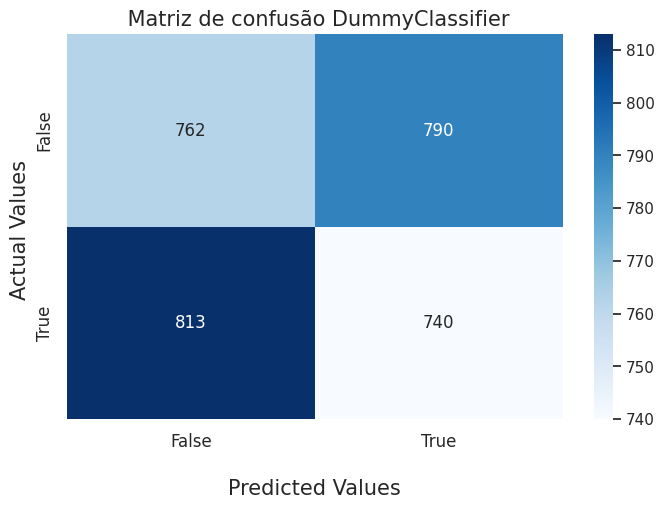

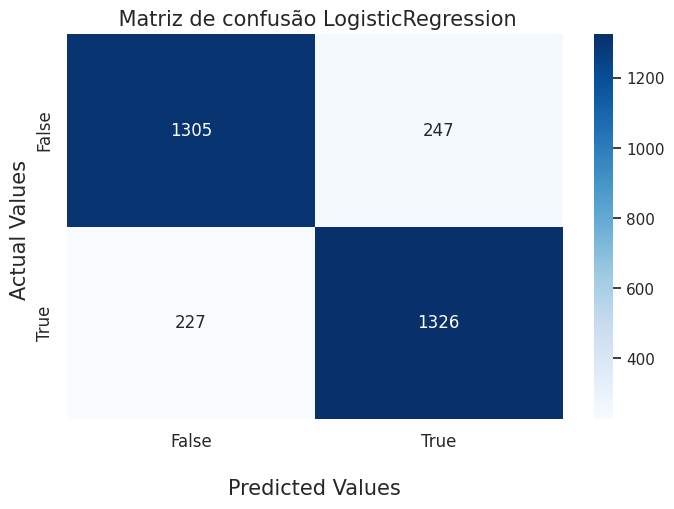

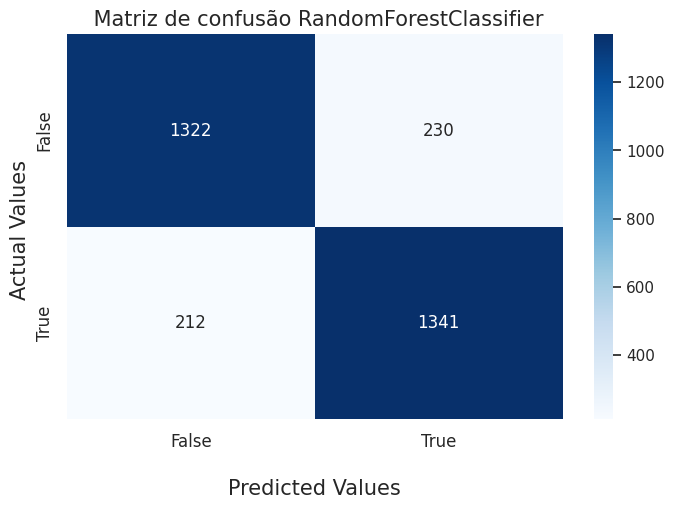

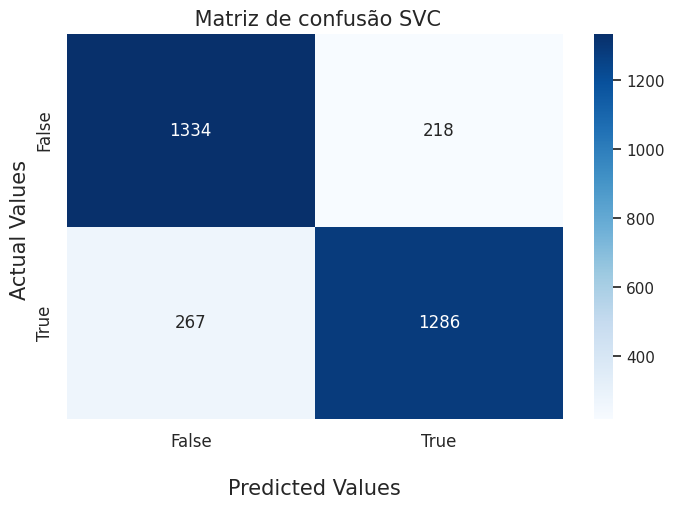

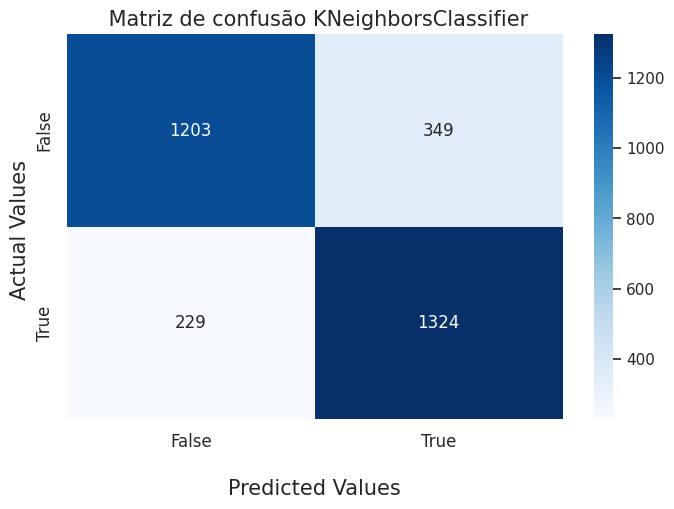

In [60]:
for modelo, y_pred in resultados.items():
    name = modelo.__class__.__name__
    metricas, cm = metricas_modelo(y_test, y_pred)
    df_metricas_1[name] = metricas
    plotar_matriz_confusao(name, cm)

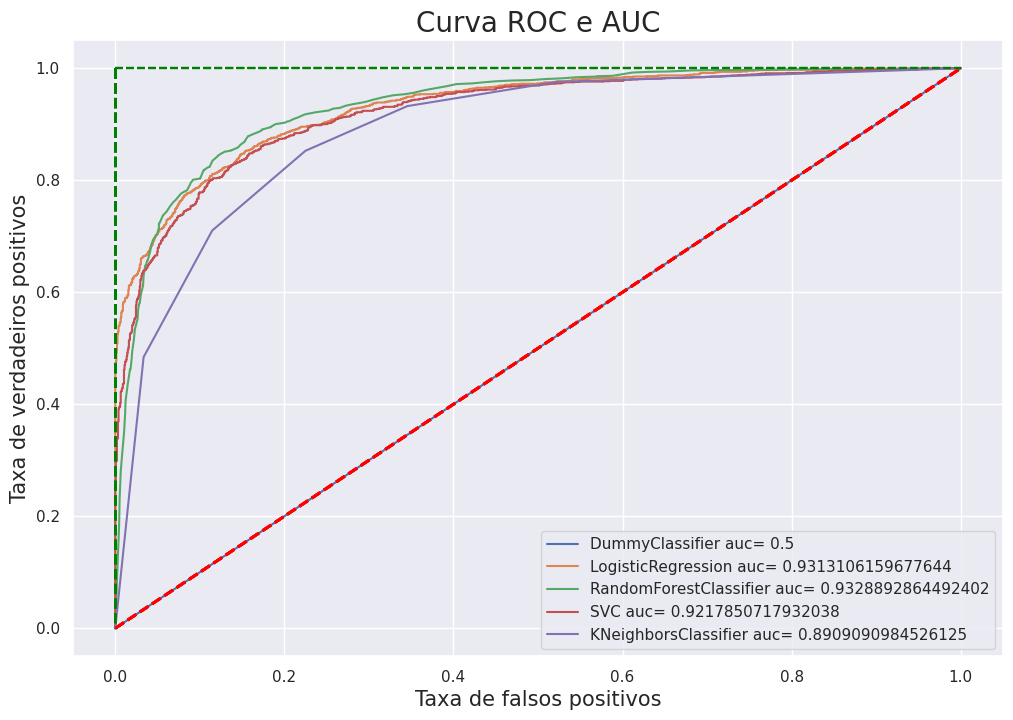

In [61]:
for classifier in classifiers:
    name = classifier.__class__.__name__
    curva_roc(classifier, name, y_test)

In [62]:
df_metricas_1.T.sort_values('Recall', ascending = False)

,Acurácia,Precisão,Recall,F1
RandomForestClassifier,0.8576,0.8536,0.8635,0.8585
LogisticRegression,0.8473,0.8430,0.8538,0.8484
KNeighborsClassifier,0.8138,0.7914,0.8525,0.8208
SVC,0.8438,0.8551,0.8281,0.8413
DummyClassifier,0.4837,0.4837,0.4765,0.4801


In [63]:
df_metricas.T.sort_values('Recall', ascending = False)

,Acurácia,Precisão,Recall,F1
KNeighborsClassifier,0.7971,0.7583,0.8725,0.8114
RandomForestClassifier,0.8390,0.8201,0.8686,0.8437
SVC,0.8151,0.7943,0.8506,0.8215
LogisticRegression,0.8000,0.7821,0.8319,0.8062
DummyClassifier,0.4837,0.4837,0.4765,0.4801


**Análise da importância das features**

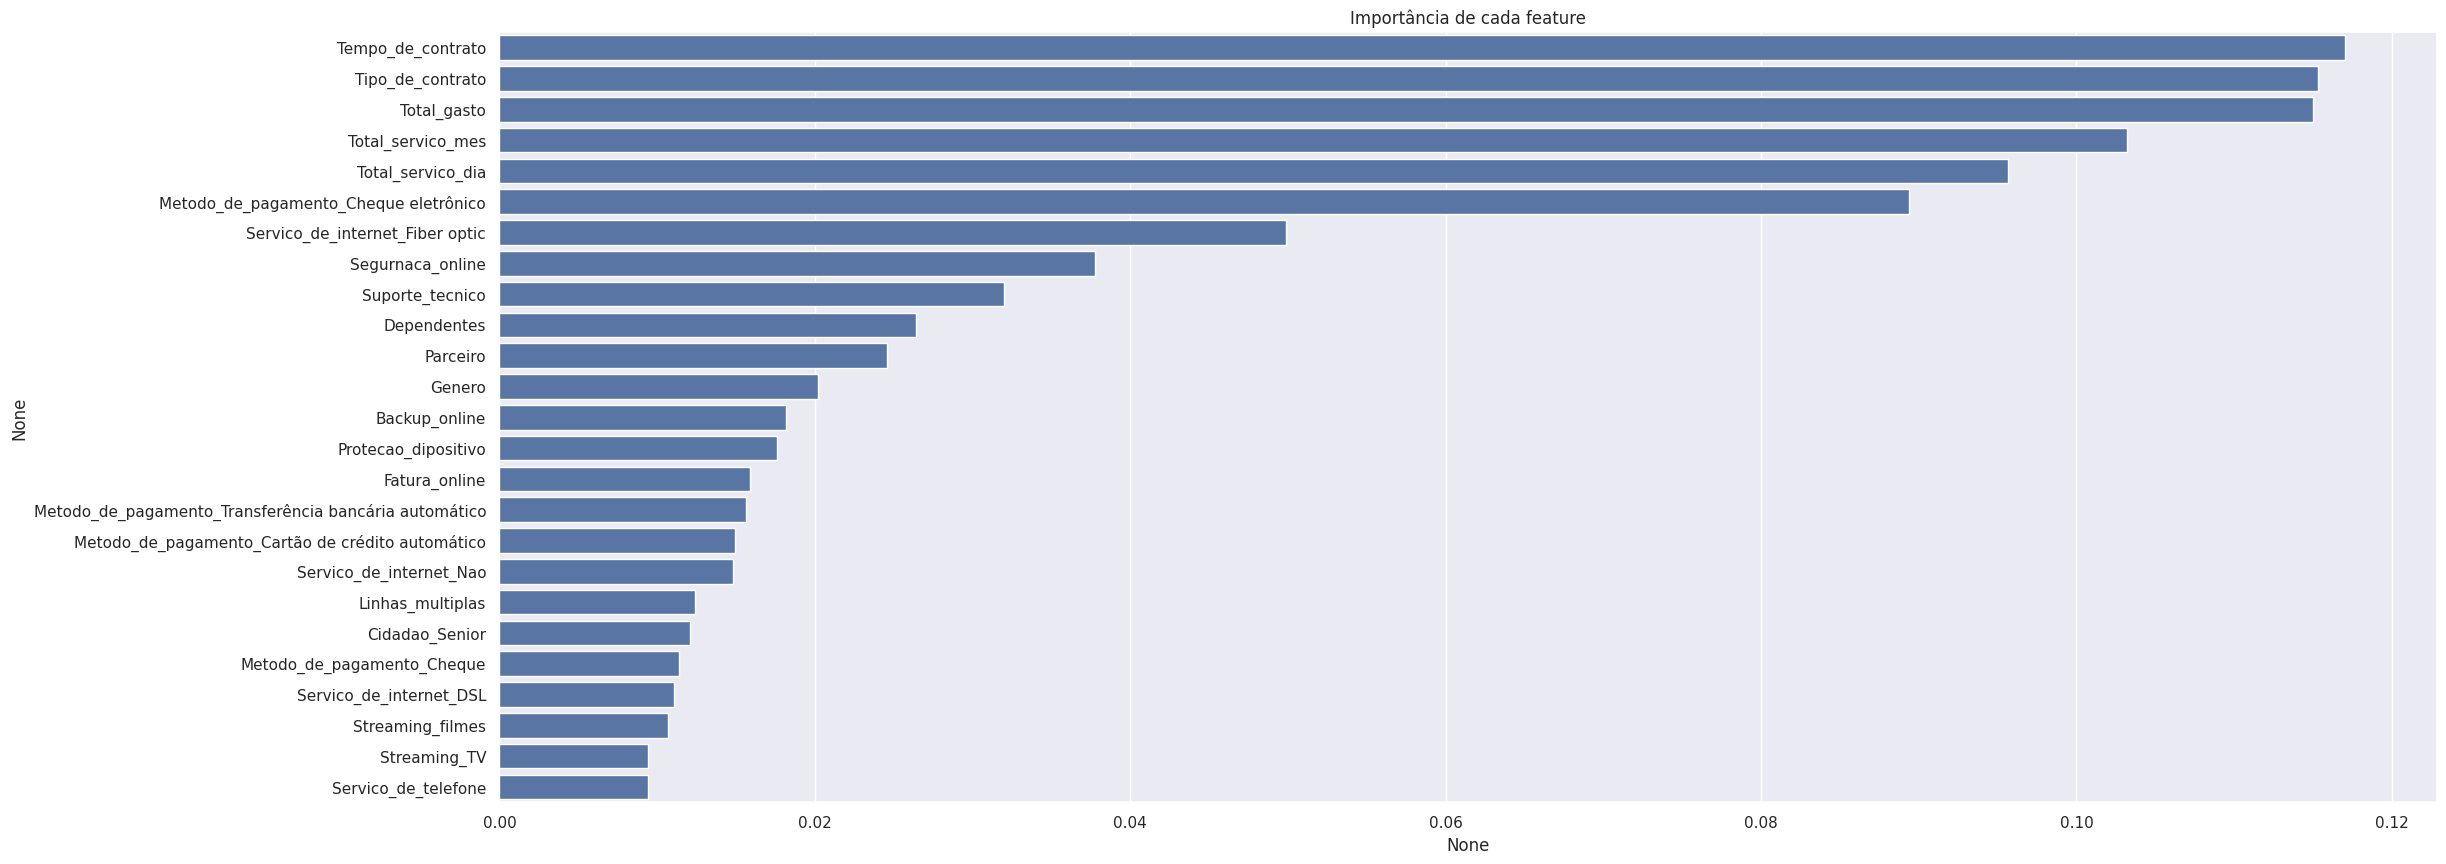

In [64]:
importances = pd.Series(data=rf.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')
plt.show()